<a href="https://colab.research.google.com/github/2303A52128/AIML_2303A52128/blob/main/STML_PROJECT-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import pair_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier




In [ ]:
df = pd.read_csv("/content/full_data.csv")

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


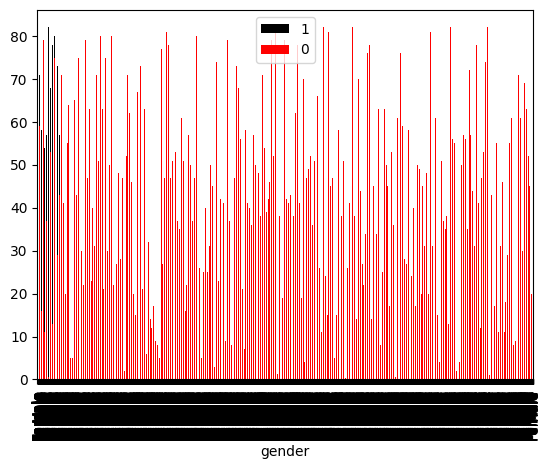

In [ ]:
target_of_1=df[df['stroke']==1]
target_of_0=df[df['stroke']==0]
axes = target_of_1.plot(kind="bar",x='gender',y='age',color='black',label=1)
target_of_0.plot(kind="bar",x='gender',y='age',color='red',ax=axes,label=0)
plt.show()

In [ ]:
df.dtypes

,0
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64
smoking_status,object


In [ ]:
replaced = df.replace({"Male":1,"Female":0,"Other":2,"never smoked":0,"formerly smoked":1,"smokes":2,"Unknown":3})
replaced.head(100)

<ipython-input-87-5cde422c89ba>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  replaced = df.replace({"Male":1,"Female":0,"Other":2,"never smoked":0,"formerly smoked":1,"smokes":2,"Unknown":3})


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Private,Urban,228.69,36.6,1,1
1,1,80.0,0,1,Yes,Private,Rural,105.92,32.5,0,1
2,0,49.0,0,0,Yes,Private,Urban,171.23,34.4,2,1
3,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,0,1
4,1,81.0,0,0,Yes,Private,Urban,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
95,1,71.0,1,1,No,Govt_job,Rural,216.94,30.9,0,1
96,1,61.0,1,0,Yes,Self-employed,Rural,76.11,27.3,2,1
97,1,74.0,0,0,Yes,Private,Urban,72.96,31.3,2,1
98,0,38.0,0,0,No,Self-employed,Urban,82.28,24.0,1,1


In [ ]:
replaced.bmi.mean()

28.498173057618956

In [ ]:
replaced.bmi=replaced.bmi.fillna(replaced.bmi.mean())
replaced.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Private,Urban,228.69,36.6,1,1
1,1,80.0,0,1,Yes,Private,Rural,105.92,32.5,0,1
2,0,49.0,0,0,Yes,Private,Urban,171.23,34.4,2,1
3,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,0,1
4,1,81.0,0,0,Yes,Private,Urban,186.21,29.0,1,1


In [ ]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(replaced[['gender','age','hypertension',"heart_disease",'avg_glucose_level','bmi','smoking_status']],df.stroke)

LinearRegression()

In [ ]:
reg.coef_

array([ 0.00030978,  0.00215388,  0.04593183,  0.05725493,  0.00034054,
       -0.00145771,  0.00617447])

In [ ]:
reg.intercept_

-0.054552410951074326

In [ ]:
reg.predict([[1,50,1,1,106.25,39.5,2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.14759055])

In [ ]:
df.columns
feature =replaced[['gender','age','hypertension','heart_disease','avg_glucose_level','bmi','smoking_status']]
X=np.asarray(feature)
Y=np.asarray(df['stroke'])
X[0:10]

array([[  1.  ,  67.  ,   0.  ,   1.  , 228.69,  36.6 ,   1.  ],
       [  1.  ,  80.  ,   0.  ,   1.  , 105.92,  32.5 ,   0.  ],
       [  0.  ,  49.  ,   0.  ,   0.  , 171.23,  34.4 ,   2.  ],
       [  0.  ,  79.  ,   1.  ,   0.  , 174.12,  24.  ,   0.  ],
       [  1.  ,  81.  ,   0.  ,   0.  , 186.21,  29.  ,   1.  ],
       [  1.  ,  74.  ,   1.  ,   1.  ,  70.09,  27.4 ,   0.  ],
       [  0.  ,  69.  ,   0.  ,   0.  ,  94.39,  22.8 ,   0.  ],
       [  0.  ,  78.  ,   0.  ,   0.  ,  58.57,  24.2 ,   3.  ],
       [  0.  ,  81.  ,   1.  ,   0.  ,  80.43,  29.7 ,   0.  ],
       [  0.  ,  61.  ,   0.  ,   1.  , 120.46,  36.8 ,   2.  ]])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
x_train.shape

(3984, 7)

In [ ]:
cls=svm.SVC(kernel='linear')
cls.fit(x_train,y_train)
Y_pred=cls.predict(x_test)
acc=accuracy_score(y_test,Y_pred)
print("Accuracy Of SVM Model is:",acc)

Accuracy Of SVM Model is: 0.9458375125376128


In [ ]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       943
           1       0.00      0.00      0.00        54

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.89      0.95      0.92       997



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


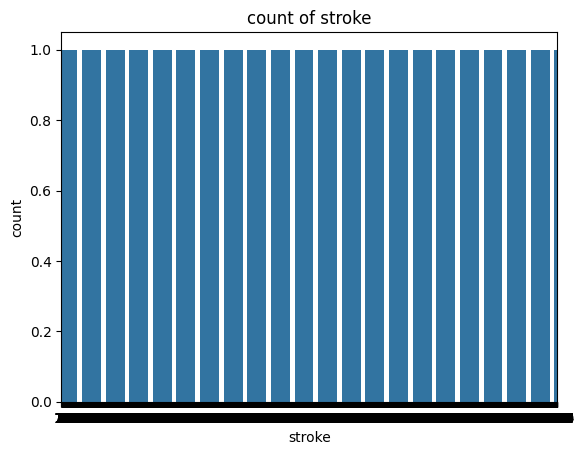

In [ ]:
sns.countplot(replaced["stroke"])
plt.xlabel("stroke")
plt.ylabel("count")
plt.title("count of stroke")
plt.show()

In [ ]:
x=replaced.iloc[:,:-1]
y=replaced.iloc[:,-1]

In [ ]:
x.shape

(4981, 10)

In [ ]:
y.shape

(4981,)

In [ ]:
y_train.shape

(3984,)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape

(3984, 10)

In [ ]:
categorical_cols = x_train.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)
x_train_encoded = pd.get_dummies(x_train, columns=categorical_cols, drop_first=True)
x_test_encoded = pd.get_dummies(x_test, columns=categorical_cols, drop_first=True)
x_train_encoded, x_test_encoded = x_train_encoded.align(x_test_encoded, join='left', axis=1, fill_value=0)
x_train_encoded = pd.get_dummies(x_train, columns=categorical_cols, drop_first=True)
x_test_encoded = pd.get_dummies(x_test, columns=categorical_cols, drop_first=True)
x_train_encoded, x_test_encoded = x_train_encoded.align(x_test_encoded, join='left', axis=1, fill_value=0)

Categorical columns: Index(['ever_married', 'work_type', 'Residence_type'], dtype='object')


In [ ]:
categorical_cols = x_train.select_dtypes(include=['object']).columns
x_train_encoded = pd.get_dummies(x_train, columns=categorical_cols, drop_first=True)
x_test_encoded = pd.get_dummies(x_test, columns=categorical_cols, drop_first=True)
x_train_encoded, x_test_encoded = x_train_encoded.align(x_test_encoded, join='left', axis=1, fill_value=0)
scaler = StandardScaler()
scaler.fit(x_train_encoded)
x_train_scaled = scaler.transform(x_train_encoded)
x_test_scaled = scaler.transform(x_test_encoded)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
acc=knn.score(x_test_scaled,y_test)
print("Accuracy Of KNN Model is:",acc)

Accuracy Of KNN Model is: 0.9428284854563691


In [ ]:
clf=knn.predict(x_test_scaled)

In [ ]:
print(classification_report(y_test,clf))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       943
           1       0.00      0.00      0.00        54

    accuracy                           0.94       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.89      0.94      0.92       997



In [ ]:
x = replaced.iloc[:,:-1]
y = replaced.iloc[:,-1]

In [ ]:
x.shape

(4981, 10)

In [ ]:
y.shape

(4981,)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
x_train.shape

(3984, 10)

In [ ]:
df = pd.read_csv("/content/full_data.csv")
df = df.dropna()
label_encoders = {}
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column].astype(str))
decision = df.drop(['stroke'], axis='columns')
target = df['stroke']
x_train, x_test, y_train, y_test = train_test_split(decision, target, test_size=0.2, random_state=42)
model = tree.DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)
acc = model.score(x_test, y_test)
print("Accuracy Of Decision Tree Model is:", acc)


Accuracy Of Decision Tree Model is: 0.9458375125376128


In [ ]:
y_pred = model.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[942   1]
 [ 53   1]]


In [ ]:
df = pd.read_csv("/content/full_data.csv")

In [ ]:
df = df.dropna()

In [ ]:
label_encoders = {}
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column].astype(str))

In [ ]:
X = df.drop('stroke',axis=1)
y = df['stroke']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
Rf = RandomForestClassifier(n_estimators=100,random_state=42)
Rf = Rf.fit(X_train,y_train)


In [ ]:
y_predict = Rf.predict(X_test)

In [ ]:
acc = accuracy_score(y_test,y_predict)
print("Accuracy of Random Forest :",acc)

Accuracy of Random Forest : 0.945819397993311


In [ ]:
CM = confusion_matrix(y_test,y_predict)
print("The confusion matrix of random forest is:",CM)

The confusion matrix of random forest is: [[1414    3]
 [  78    0]]


In [ ]:
classification_report = classification_report(y_test,y_predict)
print("The classification report of random forest is:",classification_report)

The classification report of random forest is:               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1417
           1       0.00      0.00      0.00        78

    accuracy                           0.95      1495
   macro avg       0.47      0.50      0.49      1495
weighted avg       0.90      0.95      0.92      1495

